# Test density (dens) method of SpiralArmsPotential
Qualitative checks for the density method by plotting the density with various parameters

Jack Hong

In [1]:
import galpy.potential_src.SpiralArmsPotential as spiral
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot(spiral_pot):    
    dens_img = spiral_pot.plotDensity(xy=True, rmin=-1, rmax=1, zmin=-1, zmax=1, ncontours=7)
    dens_img.set_cmap('coolwarm')
    dens_img.set_colorbar = plt.colorbar(dens_img)
    plt.title("Density")
    
    pot_img = spiral_pot.plot(xy=True, rmin=-1, rmax=1, zmin=-1, zmax=1, ncontours=7)
    pot_img.set_cmap('coolwarm')
    pot_img.set_colorbar = plt.colorbar(pot_img)
    plt.title("Potential")

## Default values
(N=2, alpha=0.3, r_ref=1, phi_ref=0, Rs=0.5, H=0.5, Cs=[1], omega=0)

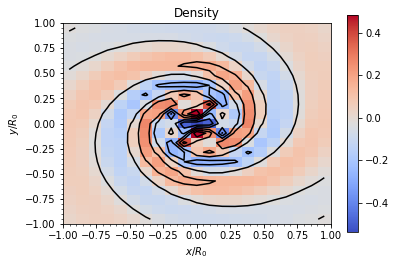

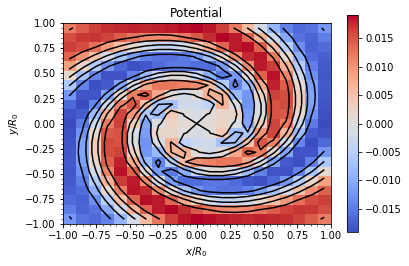

In [3]:
spiral_pot = spiral.SpiralArmsPotential()
plot(spiral_pot)

plt.show()

## Varying the reference angle $\phi_p$

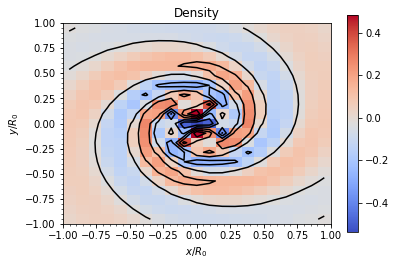

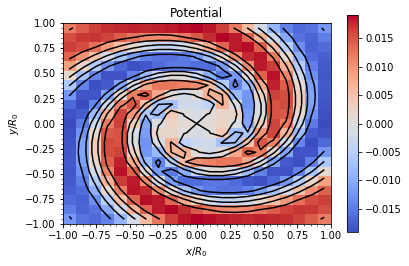

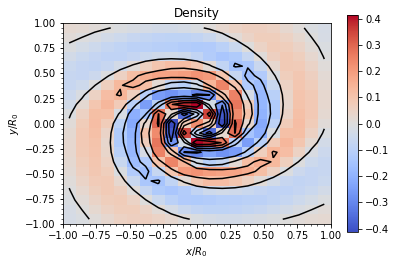

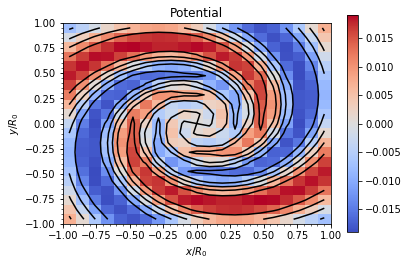

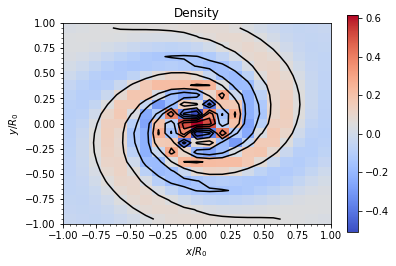

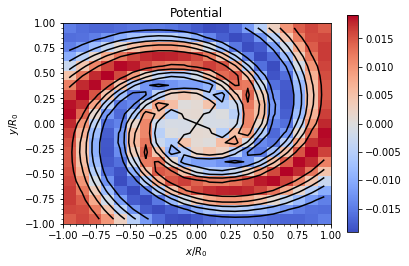

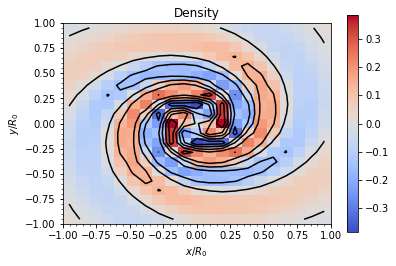

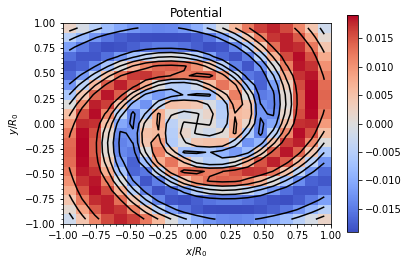

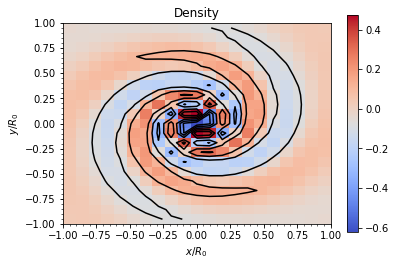

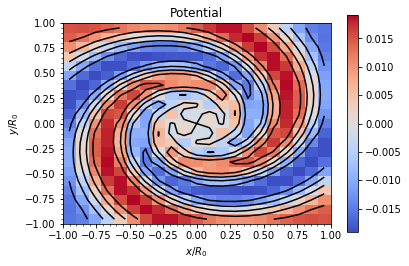

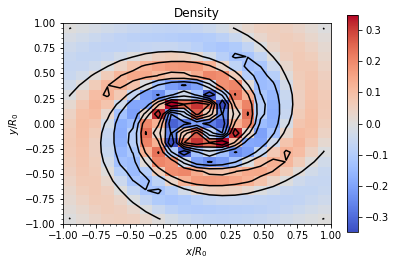

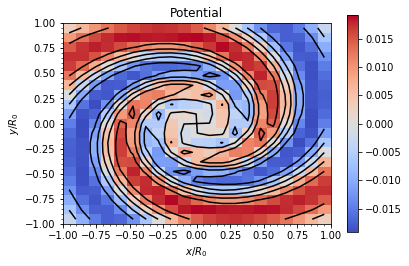

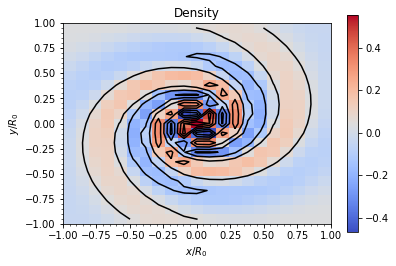

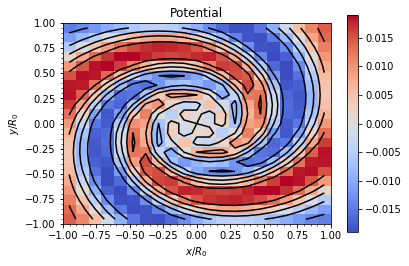

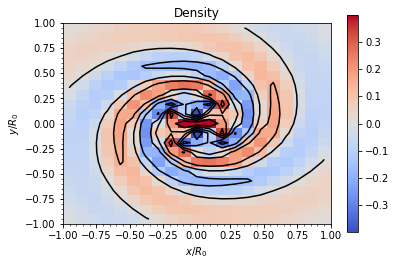

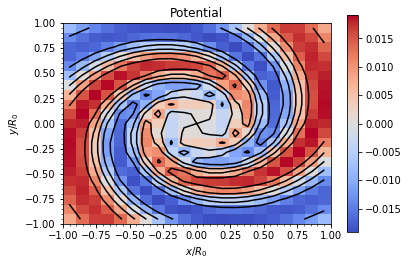

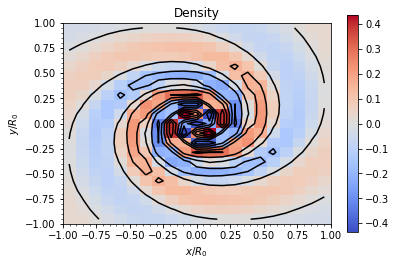

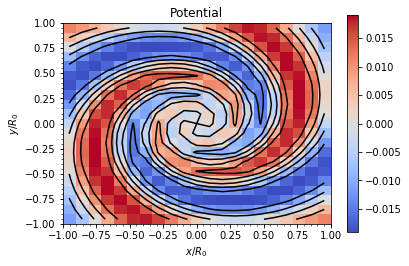

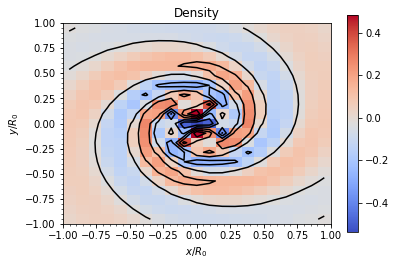

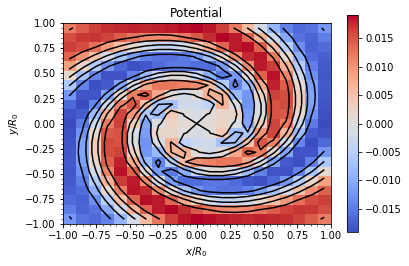

In [4]:
for phi_ref in np.linspace(0, 2*np.pi, 10):
    plot(spiral.SpiralArmsPotential(phi_ref = phi_ref))
    
plt.show()

## Varying the pitch angle $\alpha$

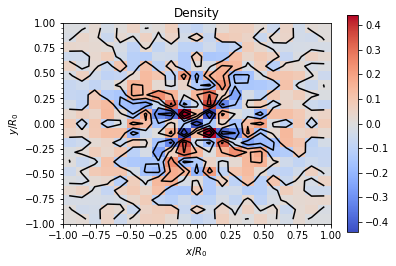

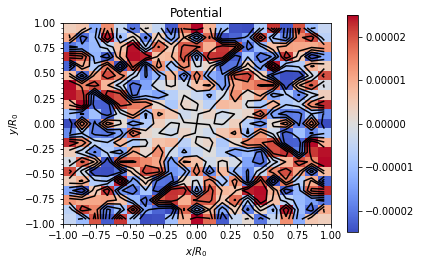

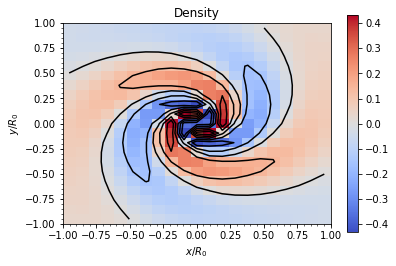

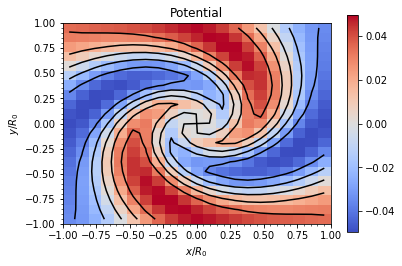

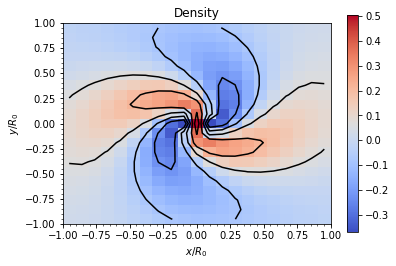

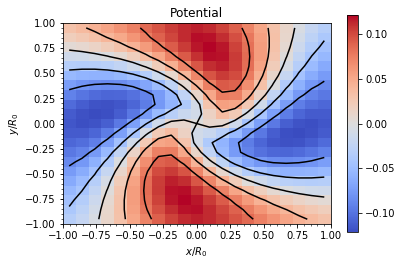

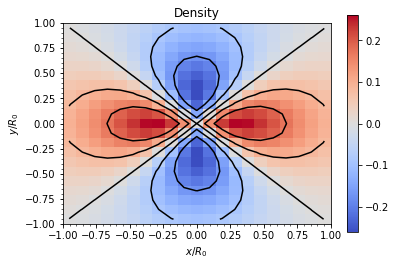

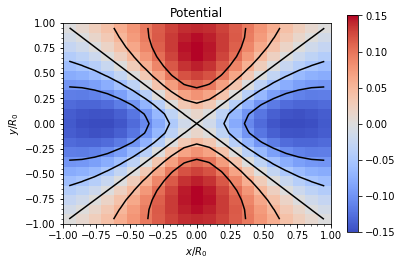

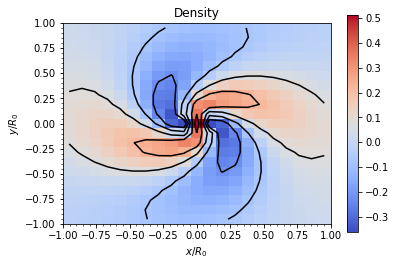

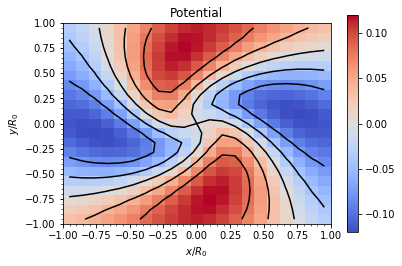

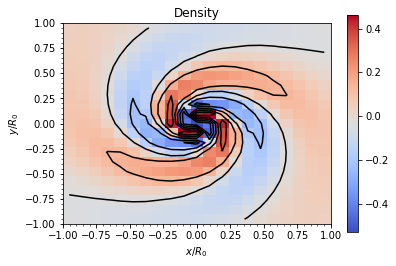

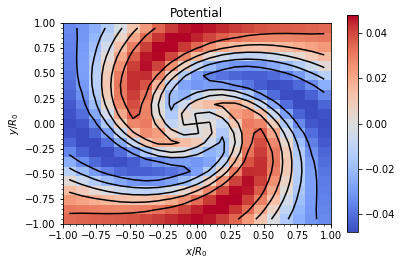

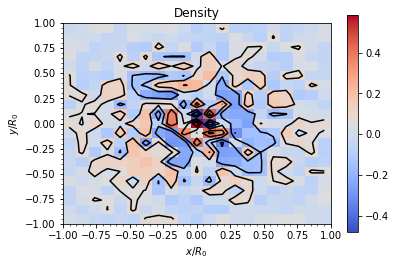

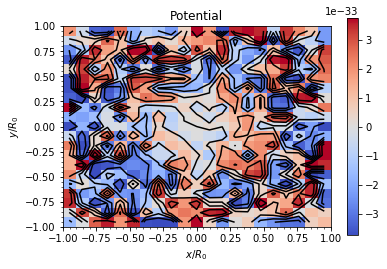

In [5]:
for alpha in np.linspace(0.01, np.pi, 7):
    plot(spiral.SpiralArmsPotential(alpha=alpha))

plt.show()

## Varying the number of arms $N$

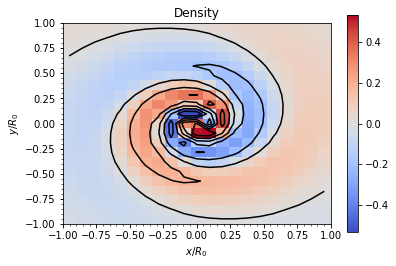

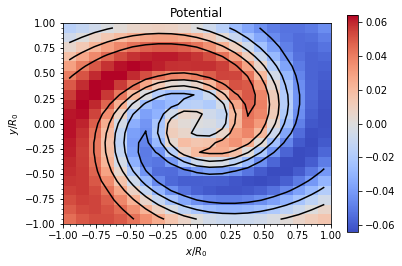

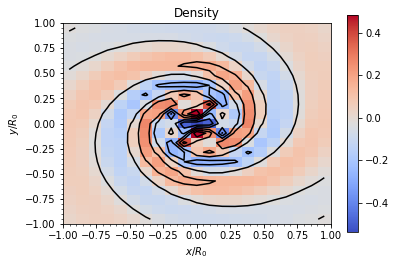

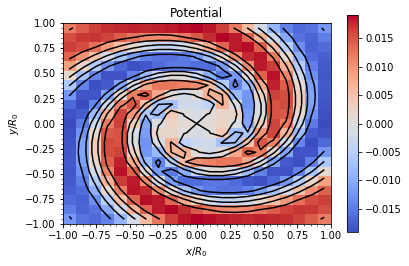

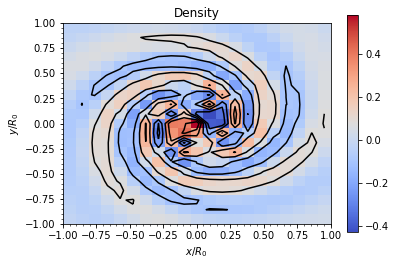

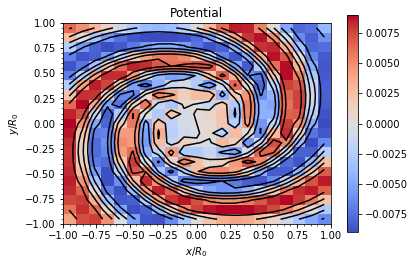

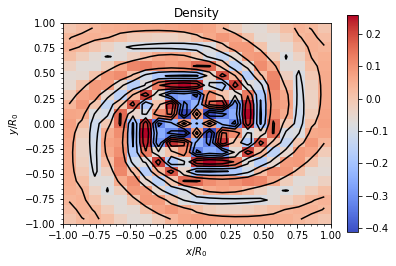

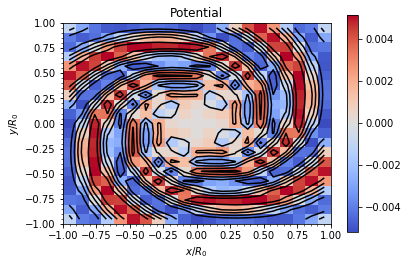

In [6]:
for N in range(1, 5):
    plot(spiral.SpiralArmsPotential(N=N))
    
plt.show()

## Varying the radial scale length $R_s$

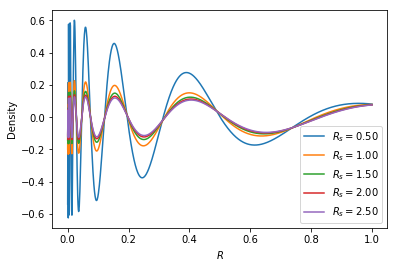

In [7]:
R = np.linspace(0, 1, 1000)
for Rs in np.linspace(0.5, 2.5, 5):
    spiral_pot = spiral.SpiralArmsPotential(Rs=Rs)
    
    dens = np.zeros(R.size)
    
    for k in np.arange(R.size):
        dens[k] = spiral_pot.dens(R[k], 0)
        
    plt.plot(R, dens, label="$R_s = {:.2f}$".format(Rs))  # (R, z, phi) = (R, 0, 0)
        
plt.xlabel("$R$")
plt.ylabel("Density")
plt.legend()
plt.show()

## Varying the scale height $H$

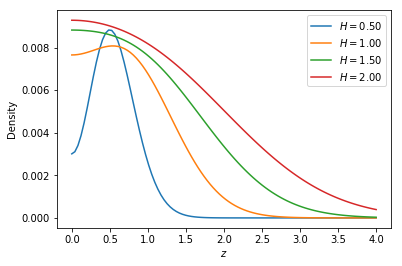

In [8]:
z = np.linspace(0, 4, 100)

for H in np.arange(0.5, 2.5, 0.5):
    spiral_pot = spiral.SpiralArmsPotential(H=H)
    dens = np.zeros(z.size)
    
    for k in np.arange(z.size):
        dens[k] = spiral_pot.dens(0.5, z[k])

    
    plt.plot(z, dens, label="$H = {:.2f}$".format(H))  # (R, z, phi) = (1, z, 0)

plt.xlabel("$z$")
plt.ylabel("Density")    
plt.legend()
plt.show()

In [9]:
p = spiral.SpiralArmsPotential()
p.dens(1., 0., forcepoisson=True)

0.081422297503329619

In [10]:
p.dens(1., 0.)

0.081186931679548949